In [1]:
from pathlib import Path
from neuropy.core.session import ProcessData
from neuropy.core.neurons import Neurons
from neuropy.analyses import correlations 
import numpy as np
import matplotlib.pyplot as plt
import time
data_dir = Path('/home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD')
sess = ProcessData(data_dir)
paradigm = np.load(sess.filePrefix.with_suffix('.paradigm.npy'),allow_pickle=True).item()


/home/selinali/miniforge3/envs/NeuroPy2/lib/python3.11/site-packages/xarray/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [21]:
from subjects1 import GroupData

In [23]:
x=GroupData()

In [ ]:
x.load()

In [2]:
start=paradigm['epochs']['start'][2]
stop=paradigm['epochs']['stop'][2]

In [3]:
chunk_starts = np.histogram_bin_edges([],bins=3,range=(start,stop))[:-1]
chunk_stops = np.histogram_bin_edges([],bins=3,range=(start,stop))[1:]
chunk_starts, chunk_stops

(array([12856., 23676., 34496.]), array([23676., 34496., 45316.]))

In [4]:
neurons = Neurons.from_dict(np.load(sess.filePrefix.with_suffix('.neurons.stable.npy'),allow_pickle=True).item())
sleep_neurons=[]
for i in range(3):
    sleep_neurons.append(neurons.time_slice(chunk_starts[i],chunk_stops[i]))
sleep_neurons

[Neurons
  n_neurons: 249
  t_start: 12856.0
  t_stop: 23676.0
  neuron_type: ['inter' 'mua' 'pyr'],
 Neurons
  n_neurons: 249
  t_start: 23676.0
  t_stop: 34496.0
  neuron_type: ['inter' 'mua' 'pyr'],
 Neurons
  n_neurons: 249
  t_start: 34496.0
  t_stop: 45316.0
  neuron_type: ['inter' 'mua' 'pyr']]

In [5]:
indices = np.argsort([neurons.spiketrains[_].shape[0] for _ in range(neurons.n_neurons)])

In [6]:
indices

array([117,  60, 105,  21, 188, 111, 181, 235,   9,  23, 194, 234, 119,
        90,  54, 187, 167, 176,  24,  82, 180, 107, 133, 128, 113, 205,
       224,  53, 129, 184,  96,  37, 161, 209, 198, 182, 190,  46,  95,
       192,  86, 212,  47, 162,  40,  58,  80,  63, 217, 163, 213, 193,
       140, 175, 156, 143, 232, 242, 208, 202,   5,  44, 201,  51, 137,
       238,  71, 216,  77, 229,  78, 220, 218, 145, 118, 112, 172, 214,
       165,   6, 122, 114,  73, 207,   2, 191, 233, 169,  27, 152, 131,
       200,  13, 132, 177,  88,  83,  34, 170, 142,  97,  84,  59, 130,
        26, 199, 183,  50, 243, 237, 225, 160, 246, 221,  42, 219,  33,
       222,  57, 115, 236, 211, 178,   7,  52, 240,  30,  75, 230, 210,
       136, 135,  11, 248, 127, 153, 244,  32,  92,  25, 203, 186,  56,
       125,  35, 239, 110, 102,  67,  19,  74, 166,  14, 227,  93,  81,
        87, 168, 196,  72, 174, 148, 173,  48,  65,  69,  62, 247, 164,
       206,  45, 171,  99,  16, 141, 139,  66, 154,  89,  18, 10

In [ ]:
neurons.spiketrains[indices[0]].shape[0], neurons.spiketrains[indices[-1]].shape[0]

(3613, 3028035)

In [ ]:
neurons.n_neurons

249

In [ ]:
neurons.get_neuron_type('pyr')
# get indices of pyr and ints
# calculate ccg between some pairs of them
# calculate strength of ccg
# TODO is there a data struture that stores connectivities

Neurons
 n_neurons: 151
 t_start: 0.0
 t_stop: 48498.5344
 neuron_type: ['pyr']

In [ ]:
print("data sampling rate\t", sess.recinfo.dat_sampling_rate)
print("eeg sampling rate\t", sess.recinfo.eeg_sampling_rate)
print("n_channels\t\t", sess.recinfo.n_channels)
print("signal dtype\t\t", sess.recinfo.sig_dtype)
print("skipped channels\t", sess.recinfo.skipped_channels)
print("discarded channels\t", sess.recinfo.discarded_channels)
print("source file\t\t", sess.recinfo.source_file)
# print(sess.recinfo.to_dict())
print("basepath\t\t", sess.basepath)
print("file prefix\t\t", sess.filePrefix)
print("probegroup\t\t", sess.probegroup)
print("channel groups\t\t",sess.recinfo.channel_groups)

data sampling rate	 30000
eeg sampling rate	 1250
n_channels		 192
signal dtype		 16
skipped channels	 [ 17 140 163]
discarded channels	 []
source file		 /home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD/RatU_Day2NSD_2021-07-24_08-16-38.xml
basepath		 /home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD
file prefix		 /home/selinali/Documents/ms_synchrony/sessions/RatU/RatUDay2NSD/RatU_Day2NSD_2021-07-24_08-16-38
probegroup		 <neuropy.core.probe.ProbeGroup object at 0x7f1fdd8e2ed0>
channel groups		 [[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
 [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
 [96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 

In [13]:
import time
bin_size = 0.0005 # 0.5 ms
window_size = 0.02 # 20 ms

def get_ccg_timed(id1,id2):
    st=time.time()
    # get ccg between neurons 0 and 1
    neuron_inds = [id1, id2]
    ccg = correlations.spike_correlations(neurons, neuron_inds, sample_rate=sess.recinfo.dat_sampling_rate,
                                        bin_size=bin_size, window_size=window_size,use_cupy=True)
    end=time.time()
    print("time elapsed ", end-st)
    return ccg

In [ ]:
# timing with cupy:
"""
shortest spiketrains in U day 4 session (two way)
time elapsed  0.8515679836273193
time elapsed  0.8398668766021729
longest spiketrains in U day 4 session (two way)
time elapsed  0.9864428043365479
time elapsed  0.9447596073150635
"""
# timing without using cupy:
"""
shortest spiketrains in U day 4 session (two way)
0.7386939525604248
0.7017326354980469
longest spiketrains in U day 4 session (two way)
1.7350304126739502
1.7177770137786865
"""
ccg01S=get_ccg_timed(indices[0],indices[1])
ccg10S=get_ccg_timed(indices[1],indices[0])

ccg01L=get_ccg_timed(indices[-1],indices[-2])
ccg10L=get_ccg_timed(indices[-2],indices[-1])

time elapsed  1.0997319221496582
time elapsed  0.8407039642333984
time elapsed  1.0042731761932373
time elapsed  0.9806981086730957


In [ ]:
def get_ccg_timed_group(neuron_inds):
    st=time.time()
    # get ccg between neurons 0 and 1
    ccg = correlations.spike_correlations(neurons, neuron_inds, sample_rate=sess.recinfo.dat_sampling_rate,
                                        bin_size=bin_size, window_size=window_size,use_cupy=True)
    end=time.time()
    print("time elapsed ", end-st)
    return ccg

In [ ]:
# timing with cupy:
# time elapsed  2.0314290523529053

# timing without using cupy:
# time elapsed  11.44138479232788

ccg10L=get_ccg_timed_group(indices[-10:])

time elapsed  2.056055784225464


In [ ]:
ccg10L.shape

(10, 10, 41)

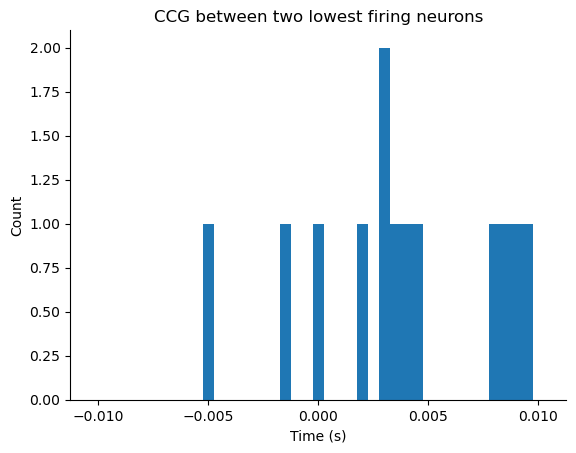

In [ ]:
import seaborn as sns
_, ax = plt.subplots()
bins = np.arange(-window_size / 2, window_size / 2 + bin_size, bin_size)
ax.bar(bins, ccg10S[1,0], width=bin_size)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count")
ax.set_title("CCG between two lowest firing neurons")
sns.despine(ax=ax)

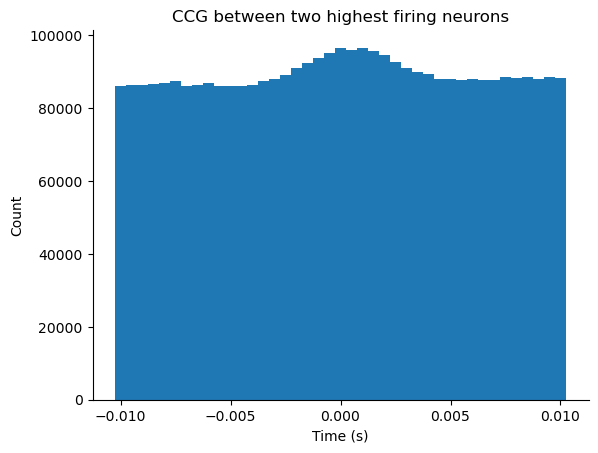

In [ ]:
import seaborn as sns
_, ax = plt.subplots()
bins = np.arange(-window_size / 2, window_size / 2 + bin_size, bin_size)
ax.bar(bins, ccg01L[0,1], width=bin_size)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count")
ax.set_title("CCG between two highest firing neurons")
sns.despine(ax=ax)

In [ ]:
sess.neurons=neurons

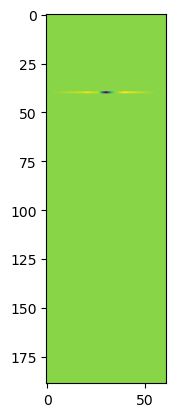

In [ ]:
# what does the waveform mean??
plt.imshow(np.array(neurons.waveforms[2],dtype=float))

In [ ]:
nneurons = np.zeros((3,3))
frates = []
mean_firing_rates = np.zeros((3,3))
sd_firing_rates = np.zeros((3,3))
iqr =  np.zeros((3,3))
types = ['pyr','inter','mua']
for i in range(3): # sleep chunk
    for j in range(len(types)): # type: pyr, inter, mua
        neus = sleep_neurons[i].get_neuron_type(types[j])
        nneurons[i,j] = neus.n_neurons
        time_duration = chunk_stops[i]-chunk_starts[i]
        frate = [neus.spiketrains[_].shape[0] for _ in range(neus.n_neurons)]/time_duration
        frates.append([frate])
        mean_firing_rates[i,j] = np.mean(frate)
        sd_firing_rates[i,j] = np.std(frate)
        iqr[i,j]  = np.percentile(frate, 75)-np.percentile(frate, 25)

Load all labeled NSD sessions in Bapun's data

    # mean firing rates did not change across sleep chunks


In [ ]:
from pathlib import Path
from neuropy.core.session import ProcessData
from neuropy.core.neurons import Neurons
import neuropy.analyses.correlations as correlations
import numpy as np
import matplotlib.pyplot as plt

all_sess = ["RatS/Day2NSD",
            "RatR/Day1NSD",
            "RatV/RatVDay1NSD",
            "RatV/RatVDay3NSD",
            "RatU/RatUDay2NSD"]

for sess_name in all_sess:
    print("==================================")
    print(f"Basic info, {sess_name}")

    # Load data
    data_dir = Path(f'/home/selinali/Documents/ms_synchrony/sessions/{sess_name}')
    sess = ProcessData(data_dir)
    paradigm = np.load(sess.filePrefix.with_suffix('.paradigm.npy'),allow_pickle=True).item()

    # Chunk into 3h slep sessions
    start=paradigm['epochs']['start'][2]
    stop=paradigm['epochs']['stop'][2]
    chunk_starts = np.histogram_bin_edges([],bins=3,range=(start,stop))[:-1]
    chunk_stops = np.histogram_bin_edges([],bins=3,range=(start,stop))[1:]
    chunk_starts, chunk_stops
    neurons = Neurons.from_dict(np.load(sess.filePrefix.with_suffix('.neurons.stable.npy'),allow_pickle=True).item())
    sleep_neurons=[]
    for i in range(3):
        sleep_neurons.append(neurons.time_slice(chunk_starts[i],chunk_stops[i]))
    print(paradigm)

    # Get population stats
    nneurons = np.zeros((3,3))
    frates = []
    mean_firing_rates = np.zeros((3,3))
    sd_firing_rates = np.zeros((3,3))
    iqr =  np.zeros((3,3))
    types = ['pyr','inter','mua']
    for i in range(3): # sleep chunk
        for j in range(len(types)): # type: pyr, inter, mua
            neus = sleep_neurons[i].get_neuron_type(types[j])
            nneurons[i,j] = neus.n_neurons
            frate = [neus.spiketrains[_].shape[0] for _ in range(neus.n_neurons)]/time_duration
            frates.append([frate])
            time_duration = chunk_stops[i]-chunk_starts[i]
            mean_firing_rates[i,j] = np.mean(frate)
            sd_firing_rates[i,j] = np.std(frate)
            iqr[i,j]  = np.percentile(frate, 75)-np.percentile(frate, 25)
    # Standard t-test
    # check if mean firing rate changes over sleep per cell type
    from scipy.stats import ttest_ind
    pyr03,pyr46,pyr79=frates[0][0],frates[3][0],frates[6][0]
    int03,int46,int79=frates[1][0],frates[4][0],frates[7][0]
    mua03,mua46,mua79=frates[2][0],frates[5][0],frates[8][0]

    # Print
    print("n_neurons (pyr, int, mua)",nneurons[0])

    print(f"Mean firing rates P VALUES, {sess_name}")
    print("SLEEP1, SLEEP2, SLEEP3 are evenly chunked from POST")
    print("1. Pyramidal neurons")
    print("SLEEP1 VS SLEEP2 ", ttest_ind(pyr03,pyr46,equal_var=True).pvalue)
    print("SLEEP1 VS SLEEP3 ", ttest_ind(pyr03,pyr79,equal_var=True).pvalue)
    print("SLEEP2 VS SLEEP3 ", ttest_ind(pyr46,pyr79,equal_var=True).pvalue)
    print("2. Interneurons")
    print("SLEEP1 VS SLEEP2 ", ttest_ind(int03,int46,equal_var=True).pvalue)
    print("SLEEP1 VS SLEEP3 ", ttest_ind(int03,int79,equal_var=True).pvalue)
    print("SLEEP2 VS SLEEP3 ", ttest_ind(int46,int79,equal_var=True).pvalue)
    print("3. Multi-unit activities")
    print("SLEEP1 VS SLEEP2 ", ttest_ind(mua03,mua46,equal_var=True).pvalue)
    print("SLEEP1 VS SLEEP3 ", ttest_ind(mua03,mua79,equal_var=True).pvalue)
    print("SLEEP2 VS SLEEP3 ", ttest_ind(mua46,mua79,equal_var=True).pvalue)

    print("mean_firing_rates",mean_firing_rates)
    print("sd_firing_rates",sd_firing_rates)
    print("iqr 25%",iqr)
    print("==================================")

Basic info, RatS/Day2NSD
{'metadata': {}, 'epochs': {'start': {0: 0, 1: 2360, 2: 6033, 3: 36902}, 'stop': {0: 2358, 1: 6031, 2: 36899, 3: 40233}, 'label': {0: 'pre', 1: 'maze', 2: 'post', 3: 're-maze'}}}


NameError: name 'time_duration' is not defined

In [ ]:
print("mean_firing_rates",mean_firing_rates)
print("sd_firing_rates",sd_firing_rates)
print("iqr 25%",iqr)
print("nneurons",nneurons)

mean_firing_rates [[ 0.76174935 23.40442083  9.9865559 ]
 [ 0.70615612 21.99234442  9.83653119]
 [ 0.72449841 22.97850431 10.24840197]]
sd_firing_rates [[ 0.76751907 10.37316044 12.59902528]
 [ 0.61818271  9.45090633 12.45793539]
 [ 0.65495225  9.81591036 12.18445028]]
iqr 25% [[ 0.71130175 17.93597505 12.82372921]
 [ 0.70180222 16.13502773 13.33468115]
 [ 0.66081331 16.35469039 13.01915434]]
nneurons [[151.  12.  86.]
 [151.  12.  86.]
 [151.  12.  86.]]


In [ ]:
from scipy.stats import ttest_ind
pyr03,pyr46,pyr79=frates[0][0],frates[3][0],frates[6][0]
print("Mean firing rates P VALUES, RatUDay2NSD")
print("SLEEP1, SLEEP2, SLEEP3 are evenyl chunked from POST")
print("1. Pyramidal cells")
print("SLEEP1 VS SLEEP2 ", ttest_ind(pyr03,pyr46,equal_var=True).pvalue)
print("SLEEP1 VS SLEEP3 ", ttest_ind(pyr03,pyr79,equal_var=True).pvalue)
print("SLEEP2 VS SLEEP3 ", ttest_ind(pyr46,pyr79,equal_var=True).pvalue)
# mean firing rates did not change across sleep chunks

Mean firing rates P VALUES, RatUDay2NSD
SLEEP1, SLEEP2, SLEEP3 are evenyl chunked from POST
1. Pyramidal cells
SLEEP1 VS SLEEP2  0.5422113289654271
SLEEP1 VS SLEEP3  0.7101296357072364
SLEEP2 VS SLEEP3  0.8031944388696979


In [ ]:
# locate to time bin
ccg = ccg01L[0,1]
positive_bin = 0 # we want to use the xth positive bin
zeroth_bin = ccg.shape[0]//2
bin = zeroth_bin + positive_bin

NameError: name 'ccg01L' is not defined

In [8]:
neurons.spiketrains[:2]

array([array([8.03333333e-03, 7.73666667e-02, 9.76000000e-02, ...,
              4.84985039e+04, 4.84985049e+04, 4.84985158e+04])    ,
       array([8.22666667e-02, 1.17733333e-01, 1.48966667e-01, ...,
              4.84984911e+04, 4.84985009e+04, 4.84985049e+04])    ],
      dtype=object)

In [9]:
indices[:2]

array([117,  60])

In [7]:
import neuropy.analyses.ms_connectivity as msconn
# jitter based synchrony index
ts = 0.001 # bin size
tj = 0.005 # jitter timescale

# Jitter
start=time.time()
ccg_jitters = msconn.ccg_jitter(neurons=neurons,
    neuron_inds=[indices[-2],indices[-1]],
    SampleRate=30000,
    binsize=ts,
    duration=0.02,
    jscale=0.005,
    njitter=200,
    alpha=0.05,
    use_cupy=True,
)
# Jitter was really slow when pairwise. takes 20s for 10 jitters
end=time.time()
print(end-start)
# The new version runs ccg between all jitters - 
# 1000 jitters takes forever (>2m)
# 500 jitters takes 20s
# 100 jitters - 1.2s
# 200 jitters - 3s
# Still inefficient because we're calculating pairwise between jitters as well
#36096 2041913 58927 3377820


KeyboardInterrupt: 

In [ ]:
import neuropy.analyses.ms_connectivity as msconn
# jitter based synchrony index
ts = 0.001 # bin size
tj = 0.005 # jitter timescale

# Jitter
start=time.time()
ccg_jitters = msconn.ccg_jitter(neurons=neurons,
    neuron_inds=[indices[-2],indices[-1]],
    SampleRate=30000,
    binsize=ts,
    duration=0.02,
    jscale=0.005,
    njitter=200,
    alpha=0.05,
    use_cupy=True,
)
# Jitter was really slow when pairwise. takes 20s for 10 jitters
end=time.time()
print(end-start)
# The new version runs ccg between all jitters - 
# 1000 jitters takes forever (>2m)
# 500 jitters takes 20s
# 100 jitters - 1.2s
# 200 jitters - 3s
# Still inefficient because we're calculating pairwise between jitters as well


shift 76
len_indices 377907
5.612642288208008


In [ ]:
import neuropy.analyses.ms_connectivity as msconn
# jitter based synchrony index
ts = 0.001 # bin size
tj = 0.005 # jitter timescale

# Jitter
start=time.time()
ccg_jitters = msconn.ccg_jitter(neurons=neurons,
    neuron_inds=[indices[0],indices[1]],
    SampleRate=30000,
    binsize=ts,
    duration=0.02,
    jscale=0.005,
    njitter=200,
    alpha=0.05,
    use_cupy=True,
)
# Jitter was really slow when pairwise. takes 20s for 10 jitters
end=time.time()
print(end-start)
# The new version runs ccg between all jitters - 
# 1000 jitters takes forever (>2m)
# 500 jitters takes 20s
# 100 jitters - 1.2s
# 200 jitters - 3s
# Still inefficient because we're calculating pairwise between jitters as well

shift 164
30.18950343132019


In [ ]:
import neuropy.analyses.ms_connectivity as msconn
# jitter based synchrony index
ts = 0.0005 # bin size
tj = 0.005 # jitter timescale
window_size = 0.02
#50,-14
# Jitter
start=time.time()
ccg_jitters = msconn.ccg_jitter(neurons=neurons,
    neuron_inds=[indices[-14],indices[50]],
    SampleRate=30000,
    binsize=ts,
    duration=window_size,
    jscale=ts*5,
    njitter=100,
    alpha=0.05,
    use_cupy=True,
)
# Jitter was really slow when pairwise. takes 20s for 10 jitters
end=time.time()
print(end-start)
# The new version runs ccg between all jitters - 
# 1000 jitters takes forever (>2m)
# 500 jitters takes 20s
# 100 jitters - 1.2s
# 200 jitters - 3s
# Still inefficient because we're calculating pairwise between jitters as well

shift 229
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
5.560903787612915


In [ ]:
bin_size = ts


In [16]:
ccg_jitters

(array([[939, 528, 459, ..., 426, 398, 430],
        [446, 426, 444, ..., 410, 424, 426],
        [423, 413, 433, ..., 444, 437, 422],
        ...,
        [414, 421, 480, ..., 403, 434, 448],
        [419, 401, 452, ..., 404, 431, 411],
        [432, 403, 443, ..., 425, 412, 430]], dtype=int32),
 array([0.  , 0.  , 0.08, 0.74, 0.48, 0.45, 0.  , 0.17, 0.05, 0.27, 0.3 ,
        0.03, 0.  , 0.72, 0.04, 0.01, 0.61, 0.76, 0.27, 0.8 , 0.28]),
 array([ True,  True,  True, False, False, False,  True, False, False,
        False, False,  True,  True, False, False,  True, False, False,
        False, False, False]))

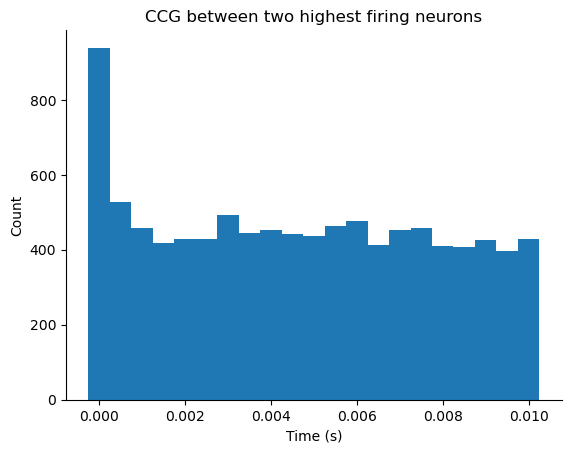

In [ ]:
# example result - submillisecond synchrony
import seaborn as sns
_, ax = plt.subplots()
bins = np.arange(0, window_size / 2 + bin_size, bin_size)
ax.bar(bins, ccg_jitters[0][0], width=bin_size)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count")
ax.set_title("CCG between two highest firing neurons")
sns.despine(ax=ax)

In [ ]:
neurons.spiketrains[indices[-1]].shape

(3028035,)

In [ ]:
ccg_jitters[1]

array([0.834, 0.626, 0.782, 0.952, 0.714, 0.478, 0.168, 0.174, 0.906,
       0.932, 0.878])

In [ ]:
bin=7

In [ ]:
# JBSI
beta = tj/(tj-ts) if tj/ts>2 else 2 # noramization constant
N = ccg[bin] # observed number of counts in the peak bin
Nj = np.mean(ccgj[:,bin])/njitter # number of counts averaged over all jitters
n1 = indices[1] # spike count of lower firing cell
jbsi = beta * (N-Nj)/n1

In [ ]:
jbsi

1.888049336650083

In [ ]:
short_neurons = neurons.time_slice(t_start=10000,t_stop=10010)

In [ ]:
correlations.cp_spike_correlations_2groups(neurons=short_neurons,
                                           ref_neuron_inds=0,
            neuron_inds=indices[-110:-107],
            sample_rate=neurons.sampling_rate,
            bin_size=0.001,
            window_size=0.005,
)

# 5 bins in 5ms window
# 30 samples per 1ms bin
# only ran two steps (shift=1,2) before stop
# neuron0=30, neuron1=216, neuron2=235


7
0
0
0
shift 3


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int32)

In [ ]:
import cupy as cp
cp.ones((2,2,3))[..., 1:]

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [ ]:
np.arange(njitter+2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
np.arange(njitter+1)+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])